In [1]:
%pylab inline
import numpy as np
import pandas as pd

from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


# Likelihood

Likelihood는 unknown parameters $ \theta $ 를 추정한는데 사용되는 함수입니다. <br>
$ X^n = (x_1, ... x_n) $ 는 joint density $ P(x^n;\theta) = p(x_1, ..., x_n; \theta) $ 를 따를때.. <br>
likelihood function 은 다음과 같이 정의 될 수 있습니다.

$$ L(\theta) = L(\theta; x^n) = P(x^n; \theta) $$

여기서 $ x^n $ 은 parameter로 고정되었으며, $ \theta $ 는 variable입니다.<br>
Likelihood의 몇가지 속성은 다음과 같습니다.

만약 데이터가 iid (identically independent distribution) 이라는 **likelihood function은 다음과 같이 정의** 됩니다.

$$ L(\theta) = \prod^n_{n=1} p(x_i;\theta) $$



## Coin Flipping Example

동전을 `independently` 10번 동졌을때 `앞면`이 나올 확률을 계산하려고 합니다.<br>
10번을 던졌을때 HHTHHHTTHH 가 나왔을때 Binomial distribution을 적용했을때 다음과 같습니다.

> Bernoulli distribution은 다음과 같습니다.<br>
> $ f(k; \theta) = \theta^k (1-\theta)^{1-k} \qquad x \in \{0, 1\} $ 

$$ \begin{align} 
P(data\ |\ \theta) &= P(HHTHHHTTHH\ |\ \theta) \\
&= \theta^{7} (1-\theta)^{10-7}
\end{align} $$

이경우 variable data $ x $ 는 이미 수집되어 있으므로 `고정`되어 있다고 봅니다.<br>
Parameters $ \theta $ 는 원래는 고정된 값이지만 아직 모르는 값입니다.

**Probability density function**와 **Likelihood function** 의 차이점은 고정되어 있는 parameters를 **서로 뒤바꿔** 준다는 것입니다.<br>
예를 들어서 $ f(x\ |\ \theta) $ 였다면 likelihood는 $ f(\theta\ |\ x) $ 로 바꿔줍니다.

$$ \begin{align} 
L(\theta\ |\ data) &= P(\theta\ |\ HHTHHHTTHH) \\
&= \theta^{7} (1-\theta)^{10-7}
\end{align} $$

Probability distribution function $ P(data\ |\ \theta) $ 와 Likelihoood function 의 결과는 동일합니다.<br>
하지만 그 `의미`는 매우 다릅니다.

$$ L(\theta\ |\ data) = P(data\ |\ \theta) $$

아래의 코드는 서로다른 $ \theta $ 에 따른 likelihood를 계산한 것입니다.

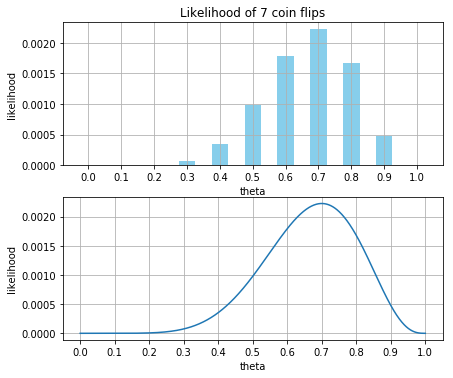

In [2]:
def bernoulli_likelihood(theta):
    return theta**7 * (1-theta)**3

def disply_plot(theta, p, plot=None):
    if plot is None:
        fig, plot = plt.subplots()
    
    if len(theta) <= 30:
        plot.bar(theta, p, align='center', color='skyblue', width=0.05)
    else:
        plot.plot(theta, p)
    ticks = np.arange(0, 1.1, 0.1)
    plot.set_xticks(ticks)
    plot.set_xticklabels(ticks)
    plot.set_xlabel('theta')
    plot.set_ylabel('likelihood')
    plot.grid()

# Display
fig, subplots = plt.subplots(2)
fig.set_figheight(5)
fig.tight_layout()
subplots[0].set_title('Likelihood of 7 coin flips')

# Plot1
theta = np.arange(0, 1.1, 0.1)
p = bernoulli_likelihood(theta)
disply_plot(theta, p, subplots[0])

# Plot2
theta = np.arange(0, 1.001, 0.001)
p = bernoulli_likelihood(theta)
disply_plot(theta, p, subplots[1])

## Fireman Test Example 

$ X^n = (x_i, ..., x_n) $ 샘플이 있으며 다음과 같은 값을 갖을 수 있습니다.

* $ x_i = 0 $ : 소방관 시험에 합격한 사람
* $ x_i = 1 $ : 소방관 시험에 불합격한 사람

$ x_i $ 가 independent Bernoulli random variables이며 parameter $ \theta $ 는 모르고 있을때, <br>
각각의 $ x_i $ 에 대한 Probability mass function 은 다음과 같을 것입니다.

$$ f(x_i; \theta) = \theta^{x_i} (1-\theta)^{1-x_i} $$

* $ \theta $ 는 확률로서 0에서 1의 값을 갖습니다.

따라서 likelihood function $ P(\theta) $ 는 다음과 같을 것입니다.

$$ \begin{align} 
L(\theta) &= \prod^n_{i=1} f(x_i; \theta)  \\ 
&= \theta^{x_1} (1-\theta)^{1-x_1} * \theta^{x_2} (1-\theta)^{1-x_2} * ... * \theta^{x_n} (1-\theta)^{1-x_n} \\
&= \theta^{\sum x_i} (1-\theta)^{n-\sum x_i}
\end{align} $$


Likelihood를 알아냈으면 **maximum likelihood**를 찾을수 있습니다. <br>
단순히 해당 likelihood $ L(\theta) $ 를 **maximize**하는 $ \theta $ 값을 찾으면 됩니다.

아래의 코드는 7명이 합격하고, 3명이 실패했을때 입니다. (coin flip과 동일) <br>
계산 방식을 각각의 probability mass function을 구한 다음에 곱으로 $ \prod $ 계산한 것입니다.

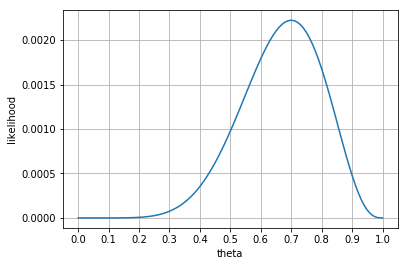

In [4]:
def bernoulli_likelihood2(x, theta):
    return theta**x * (1-theta)**(1-x)

theta = np.arange(0, 1.01, 0.01)
x = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

p = [np.prod(bernoulli_likelihood2(x, t)) for t in theta]
disply_plot(theta, p)

## Loglikehood

대부분의 경우에서는 computation의 이유로 log-likelihood 를 사용합니다.

$$ l(\theta\ |\ x) = \log L(\theta\ |\ x) $$

**예를 들어서 binomial loglikelihood** 는 다음과 같습니다.
> [log rule](https://www.rapidtables.com/math/algebra/logarithm/Logarithm_Rules.html)을 참조합니다.<br>
> power rule: $ \log m^r = r( \log m) $ <br>
> product rule: $ \log_b(x \cdot y) = \log_b(x) + \log_b(y) $

$$ \begin{align} 
l(\theta\ |\ x) &= \log \left(  \theta^x (1-\theta)^{n-x} \right) \\
&= \log \big(\theta^x \big) + \log \big((1-\theta)^{n-x} \big)  \\
&= x \log \theta + (n-x) \log (1-\theta)
\end{align}$$

대부분의 문제에서, loglikelihood는 하나의 observation으로 연산하는 것이 아니라 sample로 부터 연산을 합니다.<br>
Independent sample $ x_1, x_2, ..., x_n $ 의 likelihood의 곱은 overall likelihood와 동일합니다.

> $ x $ 이나 $ x_i $ 냐를 잘 구분지어서 봐야 합니다.

$$ \begin{align} 
L(\theta\ |\ x) &= \prod^n_{i=1} f(x_i | \theta)  \\
&= \prod^n_{i=1} L(\theta\ |\ x_i)
\end{align}$$

**Loglikelihood** 의 정의는 다음과 같습니다.

$$ \begin{align} 
l(\theta\ |\ x) &= \log \prod^n_{i=1} f(x_i\ |\ \theta) \\
&= \sum^n_{i=1} \log f(x_i\ |\ \theta) \\
&= \sum^n_{i=1} \log f(\theta\ |\ x_i)
\end{align} $$




